# PyTorch Workflow 

In [1]:
import torch
from torch import nn #building blocks for neural networks, layer creation
import matplotlib.pyplot as plt

## Data prep and load

### Linear Regression example: to study input and output then let algorithm devise formula for regression
y = a + bx

In [2]:
weight = 0.7 #b
bias = 0.3 #a

start =0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias
print(X[:10],"\n", Y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 
 tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


### Splitting test and train set (VERY IMP)

In [3]:
train_set = int(0.8*len(X))
X_train,X_test = X[:train_set],X[train_set:]
Y_train,Y_test = Y[:train_set],Y[train_set:]


In [4]:
len(Y_test)

10

In [15]:
def plot_predictions(train_data=X_train,
                     train_label=Y_train,
                     test_data=X_test,
                     test_label=Y_test,
                    predictions = None):
    plt.figure(figsize = (9,6))

    #train data blue
    plt.scatter(train_data,train_label,c='b',s=4,label = "Training Data")
    
    #test data green
    plt.scatter(test_data,test_label,c='g',s=4,label = "Test Data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')

    plt.legend(prop={'size':14}) 


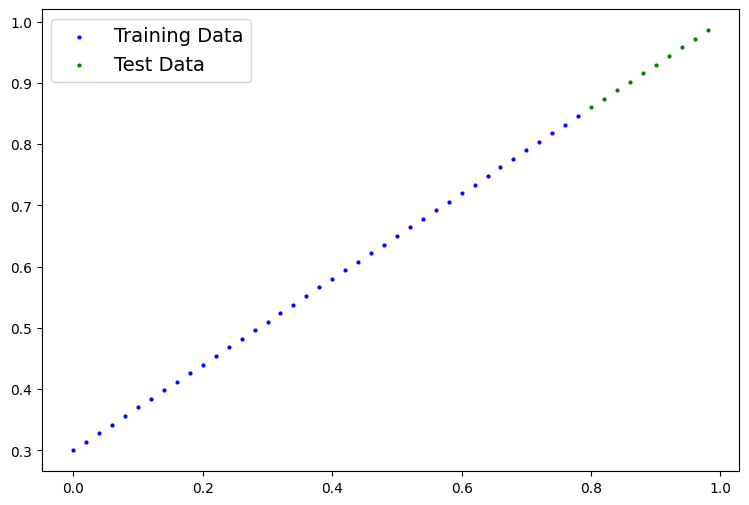

In [16]:
plot_predictions()

### Creating Linear Regression Model

In [46]:
class LinearRegressionModel(nn.Module): #inhereting nn.Module, foundation for NNs
    def __init__(self):
        super().__init__() #calls parent init functions
        self.weights = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))

        #Forward method for computation:
    def forward(self,x:torch.Tensor) ->torch.Tensor:
            return self.weights * x + self.bias
        

### PyTorch model building 

* torch.nn - building blocks for computational graphs (neural networks)
 * torch.nn.Module - base class for neural network modules, basically different layer creation, **forward** method must be redefined if subclassed
* torch.nn.Parameter - what parameters(weights/bias) the model should change, if requires_grad = True then gradient descent is calculated automatically (autograd)
* torch.nn.optim - optimizers for parameters to efficiently calculate gradient descent
  

### Creating sample model to check params

In [47]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict() #list the named parameters of the model

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [48]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

### Making predictions with `torch.inference_mode()`
Passing X_test data to model to pass values through forward(), it computes Y_test value

In [49]:
with torch.inference_mode(): #disables background gradient tracking for faster computation
    y_preds_noTrain = model_0(X_test)
y_preds_noTrain

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

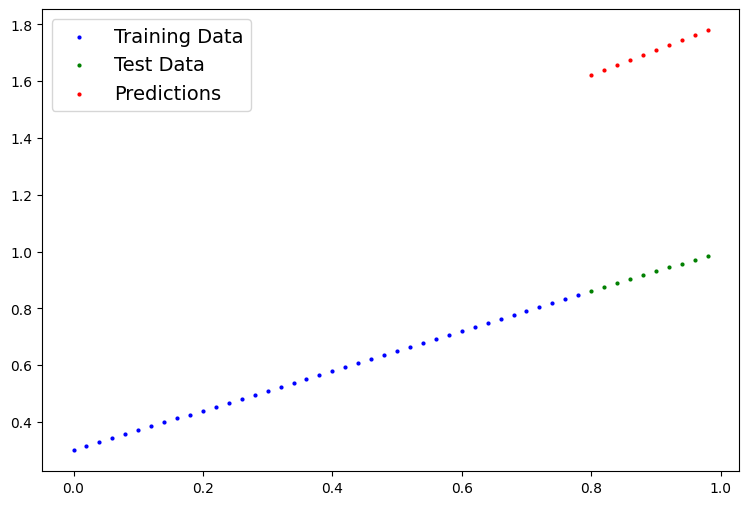

In [50]:
plot_predictions(predictions = y_preds_noTrain) #Before training

## Training our model 
* loss function/cost function/criterion : check how wrong predictions are, lower is better
* optimizer : adjusting parameters based on loss function result

#### For PyTorch, we need:
* training loop
* testing loop
  

In [51]:
#Setting up Loss function,
loss_fn = nn.L1Loss()
#Setting up optimizer, 
optimizer = torch.optim.SGD(model_0.parameters(),
                           lr = 0.01) #parameter = computer will set, hyperparameter = we will set

### Building training and testing loops

In [52]:
torch.manual_seed(42)
epochs = 100 

#Lists to store counts and values
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
    
    ###Training
    model_0.train() # turns on background features needed for training
    #1. Forward pass
    y_preds = model_0(X_train)
    #2. Loss calculation
    loss = loss_fn(y_preds,Y_train)
    #3. Optimizer zero grad
    optimizer.zero_grad()
    #4. Backpropagation with respect to loss
    loss.backward()
    #5. Optimizer step, apply gradient descent 
    optimizer.step()
    
    ###Testing
    model_0.eval() #turns off various background training features not needed for testing
    with torch.inference_mode():
        test_preds = model_0(X_test) #Forward pass
        test_loss = loss_fn(test_preds,Y_test) #Loss calculation
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
    if epoch % 10 == 0:
       
        print(f"Epoch: {epoch}, Loss:{loss},Test Loss:{test_loss}")
        print(model_0.state_dict())


Epoch: 0, Loss:0.6860889196395874,Test Loss:0.7637526988983154
OrderedDict({'weights': tensor([0.8784]), 'bias': tensor([0.9050])})
Epoch: 10, Loss:0.5708791017532349,Test Loss:0.6290428042411804
OrderedDict({'weights': tensor([0.8394]), 'bias': tensor([0.8050])})
Epoch: 20, Loss:0.45566922426223755,Test Loss:0.4943329691886902
OrderedDict({'weights': tensor([0.8004]), 'bias': tensor([0.7050])})
Epoch: 30, Loss:0.34045934677124023,Test Loss:0.35962313413619995
OrderedDict({'weights': tensor([0.7614]), 'bias': tensor([0.6050])})
Epoch: 40, Loss:0.2252494841814041,Test Loss:0.2249133139848709
OrderedDict({'weights': tensor([0.7224]), 'bias': tensor([0.5050])})
Epoch: 50, Loss:0.1100396141409874,Test Loss:0.09020347893238068
OrderedDict({'weights': tensor([0.6834]), 'bias': tensor([0.4050])})
Epoch: 60, Loss:0.009724985808134079,Test Loss:0.020998019725084305
OrderedDict({'weights': tensor([0.6539]), 'bias': tensor([0.3200])})
Epoch: 70, Loss:0.006216754671186209,Test Loss:0.0140992347151

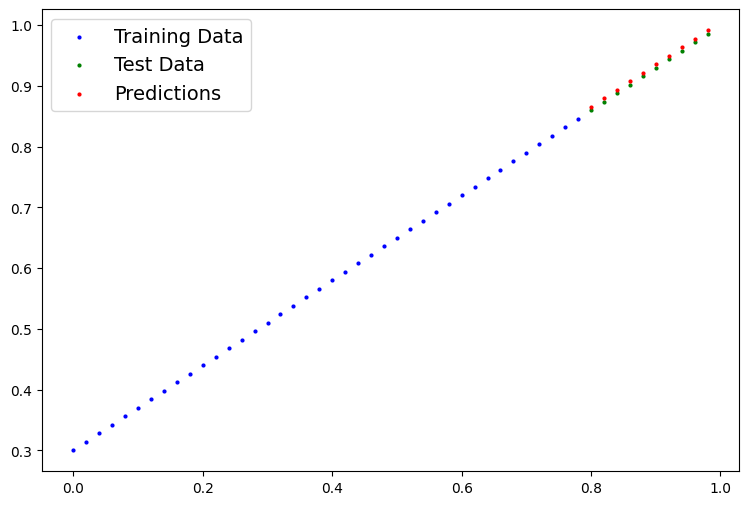

In [53]:
plot_predictions(predictions=test_preds) #after training

Text(0.5, 1.0, 'Train/Test loss curves')

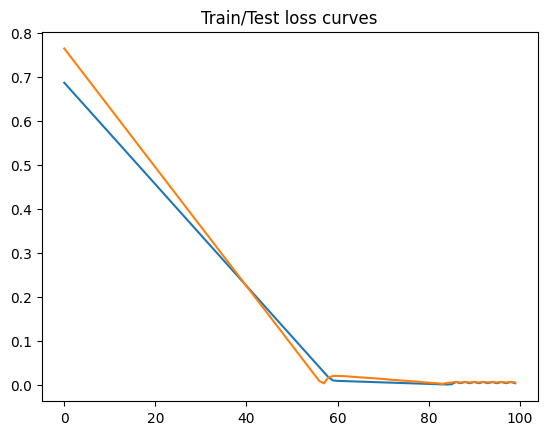

In [58]:
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = "Training loss")
plt.plot(epoch_count,test_loss_values,label = "Test loss")
plt.title("Train/Test loss curves")

### Saving models 
1. `torch.save()` - saves Pytorch object in pickle format
2. `torch.load()` - loads saved object
3. `torch.nn.Module.load_state_dict()` - loads saved state dictionary (state of parameters)

In [60]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [78]:
from pathlib import Path
#1.Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True) #no error if already exists
#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
save_path = MODEL_PATH/MODEL_NAME
#3. Save model
torch.save(model_0.state_dict(),save_path)
save_path

WindowsPath('models/01_pytorch_workflow_model_0.pth')

### Loading models 

In [79]:
#Create new model from same class
model_1 = LinearRegressionModel()
#Loading saved `state_dict()` from saved path
model_1.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [80]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [86]:
model_1.eval()
with torch.inference_mode():
    test_preds_loaded = model_1(X_test)
y_preds_loaded

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [87]:
test_preds == test_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])